In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score,plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [51]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are null values which needs to be replaced

In [53]:
#Checking the null values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

I feel Gender doesn't give weitage to predict target so can drop<br>
Loan_ID is a nominal feature which can be dropped
There exists NaNs in many features which needs to be imputed<br>
Married feature is binary categorical type and NaNs can be replaced with most frequent value<br>
Dependents feature is categorical type and NaNs can be replaced with most frequent value<br>
Self_Emplyed feature is binary ctegorical type and NaNs can be replaced with most frequent value<br>
LoanAmount,Loan_Amount_Term and Credit_History fetures are of float data type and can fill NaNs with the mean<br>
There are many object type features which need to be encoded

In [54]:
#Drop duplicates if any and nominal features
df.drop_duplicates(inplace=True)
df = df.drop(['Gender','Loan_ID'],axis=1)

In [55]:
df.shape

(614, 11)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [57]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [58]:
#Fill NaNs with most occuring data using simple imputer
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    float64
 1   Dependents         614 non-null    float64
 2   Education          614 non-null    float64
 3   Self_Employed      614 non-null    float64
 4   ApplicantIncome    614 non-null    float64
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    float64
 10  Loan_Status        614 non-null    float64
dtypes: float64(11)
memory usage: 52.9 KB


In [60]:
df.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Looks like ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term are having outliers

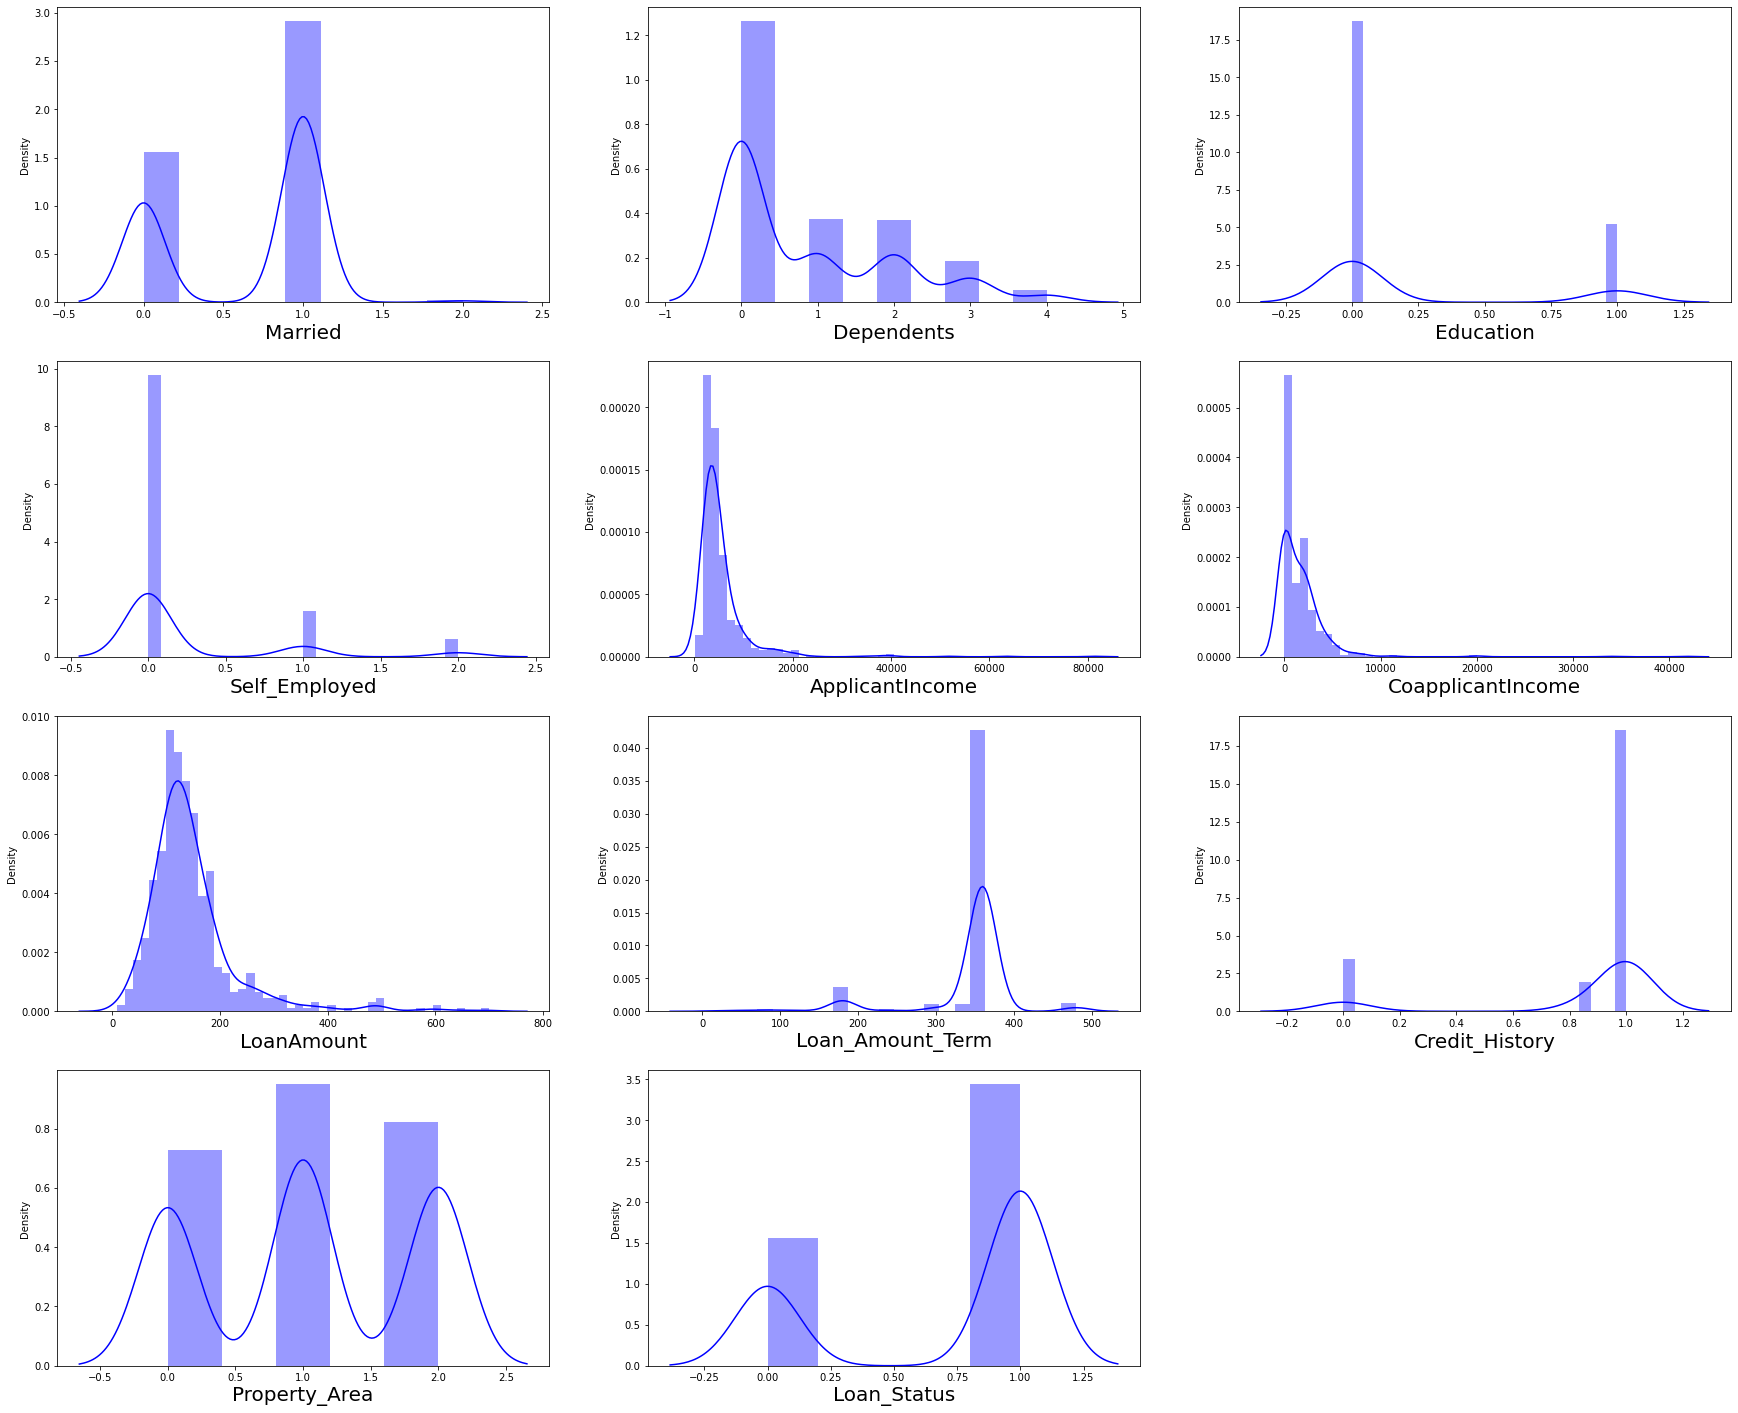

In [61]:
#Visualize the data distribution
plt.figure(figsize = (30,25))
n = 1

for column in df:
    if n <=11:
        ax = plt.subplot(4,3,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

In [62]:
from scipy.stats import zscore
#Features having outliers
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


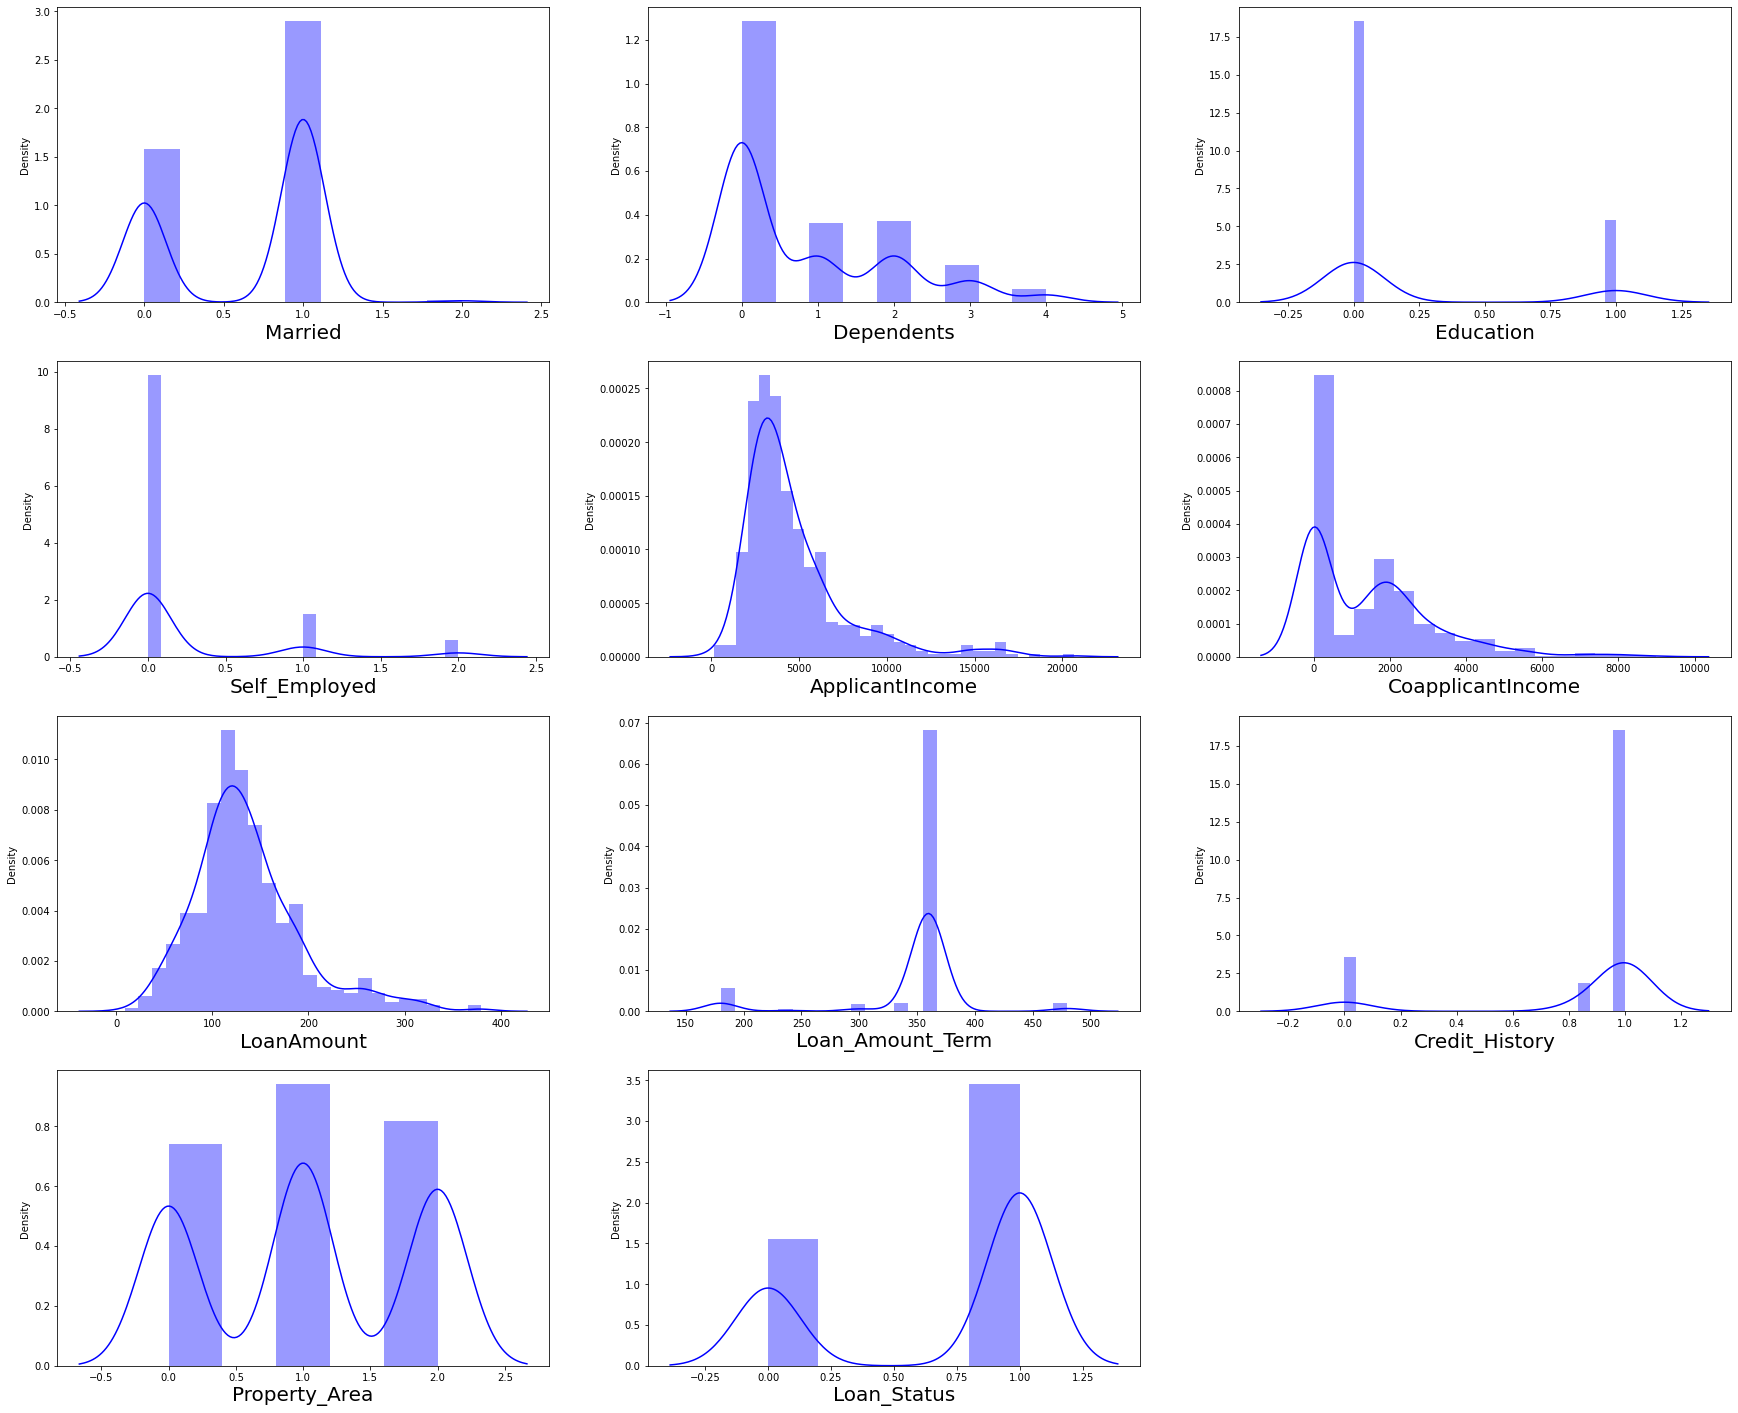

In [63]:
#Visualize the data distribution
plt.figure(figsize = (30,25))
n = 1

for column in df_new:
    if n <=11:
        ax = plt.subplot(4,3,n)
        sns.distplot(df_new[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

Data looks much better now

In [64]:
#Checking shape of new dataset
df_new.shape

(577, 11)

In [65]:
#Checking dataloss
Dataloss = (((614-577)/614)*100)
print(Dataloss)

6.026058631921824


So, I can see 6% dataloss in zscore method after removing outliers which is ok

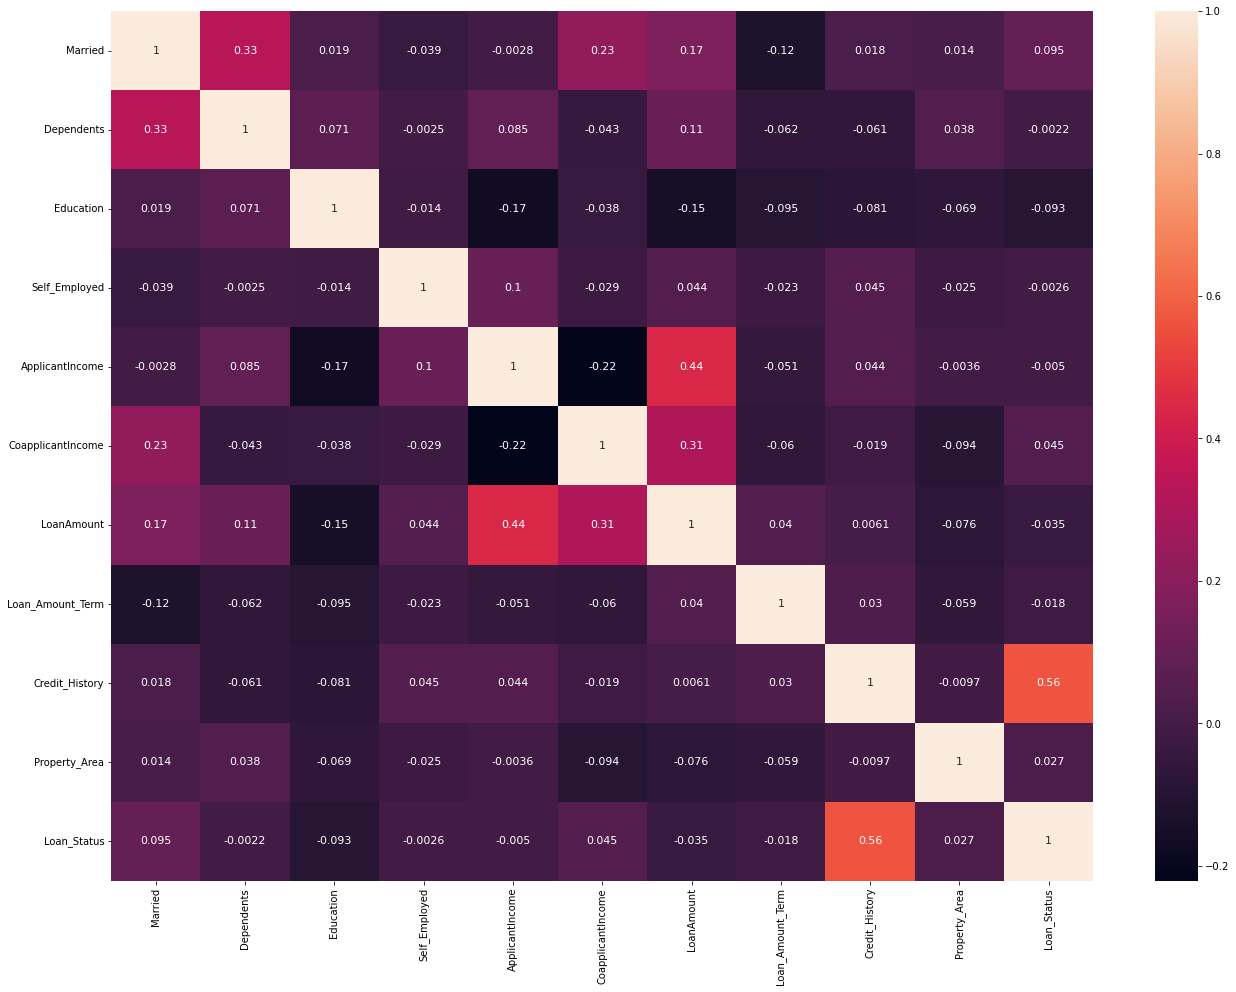

In [66]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df_new.corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':11})
plt.show()

So there is no multicollinearity problem

In [67]:
x = df_new.drop('Loan_Status',axis=1)
y = df_new.Loan_Status

In [68]:
#Split the data into 2 parts using Hold Out method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56)

In [69]:
# Model instantiation with default parameters
lr = LogisticRegression()
# Train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.94      0.42      0.58        38
         1.0       0.83      0.99      0.90       107

    accuracy                           0.84       145
   macro avg       0.88      0.71      0.74       145
weighted avg       0.86      0.84      0.82       145



In [71]:
#Let us improve the accuracy using gridsearchcv
params = {'n_jobs':[1,2,3],'penalty':['l1','l2'],'max_iter':range(50,150,10)}
grid_search = GridSearchCV(lr,params,cv=10)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'max_iter': 90, 'n_jobs': 1, 'penalty': 'l2'}

In [72]:
lr = LogisticRegression(n_jobs=1,penalty='l2',max_iter=90)
# Train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.94      0.42      0.58        38
         1.0       0.83      0.99      0.90       107

    accuracy                           0.84       145
   macro avg       0.88      0.71      0.74       145
weighted avg       0.86      0.84      0.82       145



Not able to improve the performance even after hyperparameter tuning

In [73]:
#Check if model is overfitting
print(cross_val_score(lr,x,y,cv=5).mean())

0.8146026986506746


In [74]:
# model instantiation with default parameters
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.43      0.68      0.53        38
         1.0       0.86      0.68      0.76       107

    accuracy                           0.68       145
   macro avg       0.65      0.68      0.65       145
weighted avg       0.75      0.68      0.70       145



In [75]:
params = { 'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(2,8),'min_samples_split':range(3,8)}
grid_search = GridSearchCV(dtc,param_grid=params,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [76]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=3,min_samples_split=5)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.43      0.53      0.47        38
         1.0       0.82      0.75      0.78       107

    accuracy                           0.69       145
   macro avg       0.62      0.64      0.63       145
weighted avg       0.71      0.69      0.70       145



Accuracy improved from 68% to 69% after hyperparameter tuning

In [77]:
#Check if model is overfitting
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7348575712143928


In [80]:
# Model instantiation with default parameters
rfc = RandomForestClassifier()
# Train the model
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.71      0.45      0.55        38
         1.0       0.83      0.93      0.88       107

    accuracy                           0.81       145
   macro avg       0.77      0.69      0.71       145
weighted avg       0.80      0.81      0.79       145



In [82]:
params = { 'n_estimators':[13,15],'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(5,6),'min_samples_split':range(10,11)}
grid_search = GridSearchCV(rfc,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 15}

In [83]:
rfc=RandomForestClassifier(n_estimators=15,criterion='gini',max_depth=11,min_samples_leaf=5,min_samples_split=10)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.88      0.39      0.55        38
         1.0       0.82      0.98      0.89       107

    accuracy                           0.83       145
   macro avg       0.85      0.69      0.72       145
weighted avg       0.84      0.83      0.80       145



Accuracy improved from 81% to 83% after hyperparameter tuning

In [84]:
#Check if model is overfitting
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8163418290854573


In [90]:
# Model instantiation with default parameters
knn = KNeighborsClassifier()
# Train the model
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.42      0.26      0.32        38
         1.0       0.77      0.87      0.82       107

    accuracy                           0.71       145
   macro avg       0.59      0.57      0.57       145
weighted avg       0.68      0.71      0.69       145



In [99]:
params = { 'algorithm':['kd_tree','brute'],'leaf_size':[1,2,3,4,5,6,7,8,10,11,14],'n_neighbors':[3,5,7,9,11,13,15,17]}
grid_search = GridSearchCV(knn,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 13}

In [100]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=1,n_neighbors=13)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.33      0.16      0.21        38
         1.0       0.75      0.89      0.81       107

    accuracy                           0.70       145
   macro avg       0.54      0.52      0.51       145
weighted avg       0.64      0.70      0.66       145



Not able to improve the performance even after hyperparameter tuning

In [101]:
#Check if model is overfitting
print(cross_val_score(knn,x,y,cv=5).mean())

0.6742128935532234


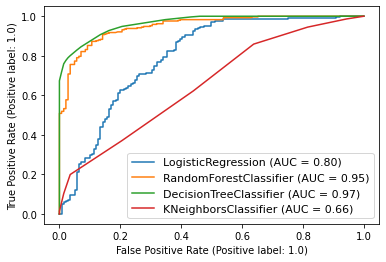

In [103]:
#let me plot roc curve to chose the best model
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dtc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

So based on the accuracy the best fit model is DecisionTreeClassifier

In [104]:
# save the model to disk
filename = 'Census_Income_Model.sav'
pickle.dump(dtc, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0.])

In [105]:
pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
Predicted,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
Original,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
